# Gradient descent visualization

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
LR = 0.1
REAL_PARAMS = [1.2, 2.5]
INIT_PARAMS = [[5, 4],
               [5, 1],
               [2, 4.5]][2]

x = np.linspace(-1, 1, 200, dtype=np.float32)   # x data

In [3]:
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

a= 1.204789 b= 2.5223646


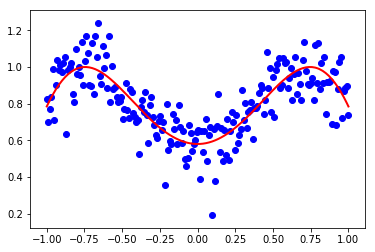

In [4]:
y_fun = lambda a, b: np.sin(b*np.cos(a*x))
tf_y_fun = lambda a, b: tf.sin(b*tf.cos(a*x))

noise = np.random.randn(200)/10
y = y_fun(*REAL_PARAMS) + noise         # target

# tensorflow graph
a, b = [tf.Variable(initial_value=p, dtype=tf.float32) for p in INIT_PARAMS]
pred = tf_y_fun(a, b)
mse = tf.reduce_mean(tf.square(y-pred))
train_op = tf.train.GradientDescentOptimizer(LR).minimize(mse)

a_list, b_list, cost_list = [], [], []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for t in range(400):
        a_, b_, mse_ = sess.run([a, b, mse])
        a_list.append(a_); b_list.append(b_); cost_list.append(mse_)    # record parameter changes
        result, _ = sess.run([pred, train_op])                          # training


# visualization codes:
print('a=', a_, 'b=', b_)
plt.figure(1)
plt.scatter(x, y, c='b')    # plot data
plt.plot(x, result, 'r-', lw=2)   # plot line fitting
# 3D cost figure

for angle in range(0, 360, 2):
    fig = plt.figure(figsize=(8,8))
    ax = Axes3D(fig)
    a3D, b3D = np.meshgrid(np.linspace(-2, 7, 30), np.linspace(-2, 7, 30))  # parameter space
    cost3D = np.array([np.mean(np.square(y_fun(a_, b_) - y)) for a_, b_ in zip(a3D.flatten(), b3D.flatten())]).reshape(a3D.shape)
    ax.plot_surface(a3D, b3D, cost3D, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'), alpha=0.5)
    ax.scatter(a_list[0], b_list[0], zs=cost_list[0], s=300, c='r')  # initial parameter place
    ax.set_xlabel('a'); ax.set_ylabel('b')
    ax.plot(a_list, b_list, zs=cost_list, zdir='z', c='r', lw=3)    # plot 3D gradient descent
    ax.view_init(30, angle)
    plt.savefig("./gradient_descent/gc_" + makeIndexOfLength(angle, 3) + ".png")
    plt.close()